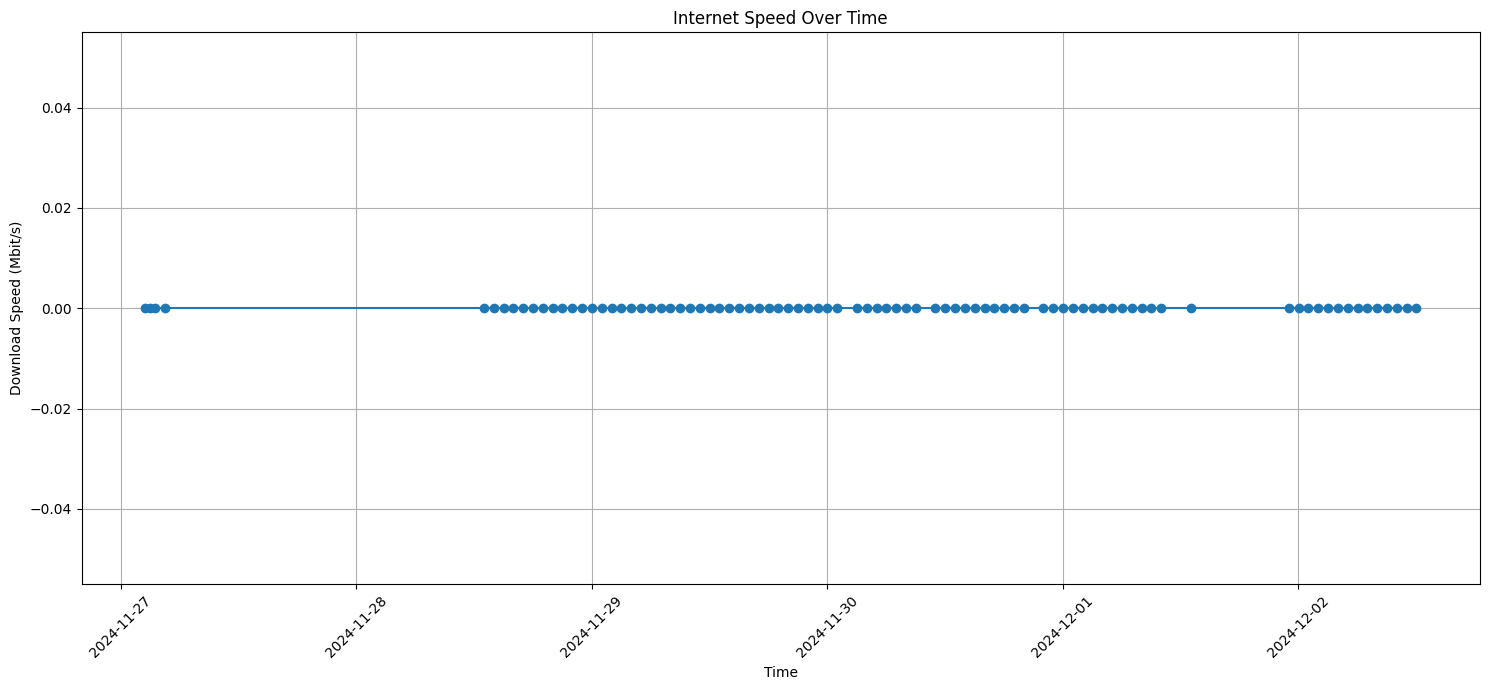

In [1]:
import re
import matplotlib.pyplot as plt
from datetime import datetime

# Initialize lists for timestamps and speeds
timestamps = []
speeds = []

# Define regex patterns for parsing the log file
success_pattern = re.compile(r"(.+): Speed test successful.\n.+Download: ([\d.]+) Mbit/s")
failed_pattern = re.compile(r"(.+): Speed test failed")

# Path to the log file (replace with the correct path)
log_file_path = "wifi_speedtest.log"

# Process the log file
with open(log_file_path, "r") as file:
    for line in file:
        success_match = success_pattern.match(line)
        failed_match = failed_pattern.match(line)

        if success_match:
            # Extract timestamp and speed for successful tests
            timestamp = success_match.group(1)
            speed = float(success_match.group(2))
        elif failed_match:
            # Extract timestamp and set speed to 0 for failed tests
            timestamp = failed_match.group(1)
            speed = 0.0
        else:
            continue

        # Convert timestamp to datetime object and append to lists
        timestamps.append(datetime.strptime(timestamp, "%a %b %d %I:%M:%S %p %Z %Y"))
        speeds.append(speed)

# Plot the data
plt.figure(figsize=(15, 7))
plt.plot(timestamps, speeds, marker="o", linestyle="-")
plt.title("Internet Speed Over Time")
plt.xlabel("Time")
plt.ylabel("Download Speed (Mbit/s)")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


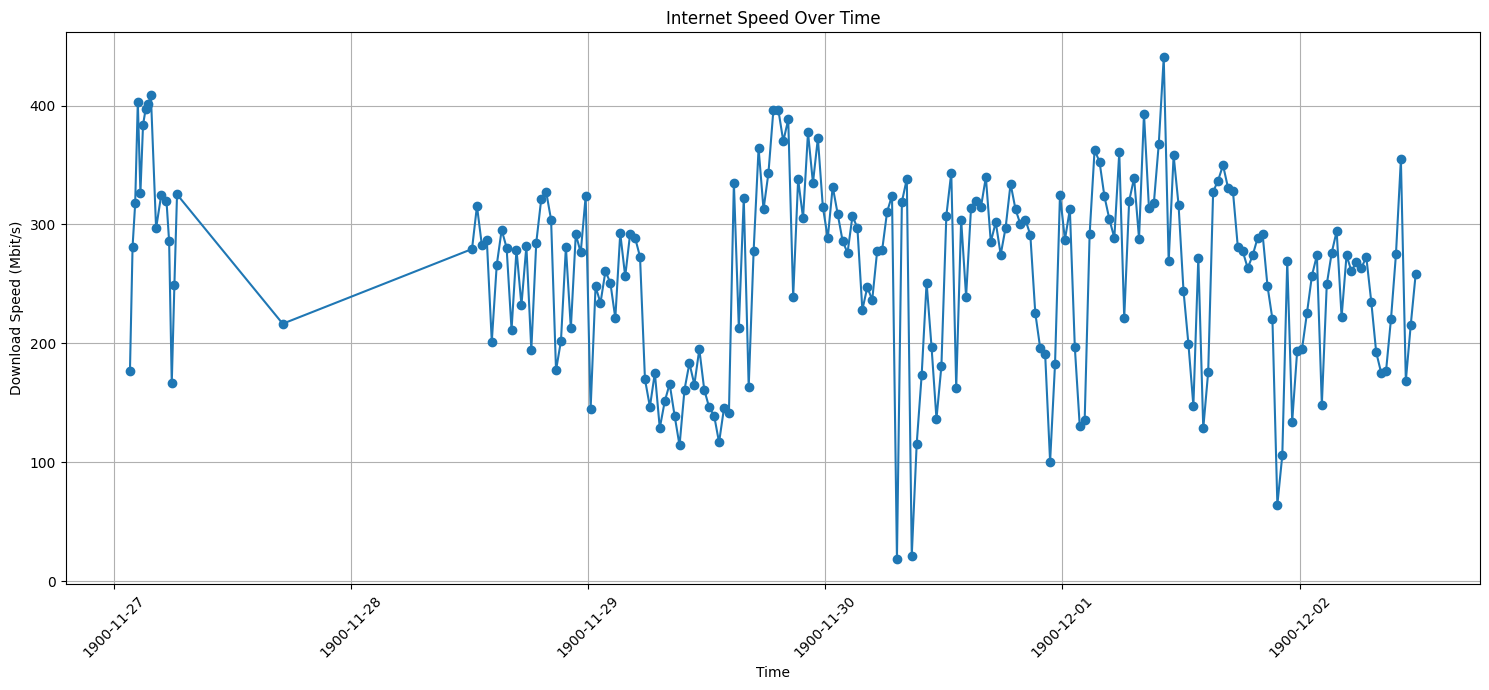

In [2]:
# Update the regex to handle multi-line matching more effectively
# This time using a multiline approach to read and capture entire log blocks

import re

# Adjust the regex patterns to capture the entire log block correctly
log_block_pattern = re.compile(
    r"(?P<timestamp>.+): Speed test successful\.\nPing: (?P<ping>[\d.]+) ms\nDownload: (?P<download>[\d.]+) Mbit/s\nUpload: (?P<upload>[\d.]+) Mbit/s"
)

# Reinitialize lists
timestamps = []
speeds = []
log_file_path = "wifi_speedtest15.log"
# Read the log file content as a whole
with open(log_file_path, "r") as file:
    log_content = file.read()

# Use finditer to get all matches from the log content
for match in log_block_pattern.finditer(log_content):
    timestamp = match.group("timestamp")
    download_speed = float(match.group("download"))
    
    # Append raw timestamp and download speed
    timestamps.append(timestamp)
    speeds.append(download_speed)

# Convert timestamps to datetime objects for plotting
parsed_timestamps = []
for ts in timestamps:
    cleaned_ts = " ".join(ts.split()[:-2])  # Removes the timezone part
    parsed_timestamps.append(datetime.strptime(cleaned_ts, "%a %b %d %I:%M:%S %p"))

# Plot the data
plt.figure(figsize=(15, 7))
plt.plot(parsed_timestamps, speeds, marker="o", linestyle="-")
plt.title("Internet Speed Over Time")
plt.xlabel("Time")
plt.ylabel("Download Speed (Mbit/s)")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


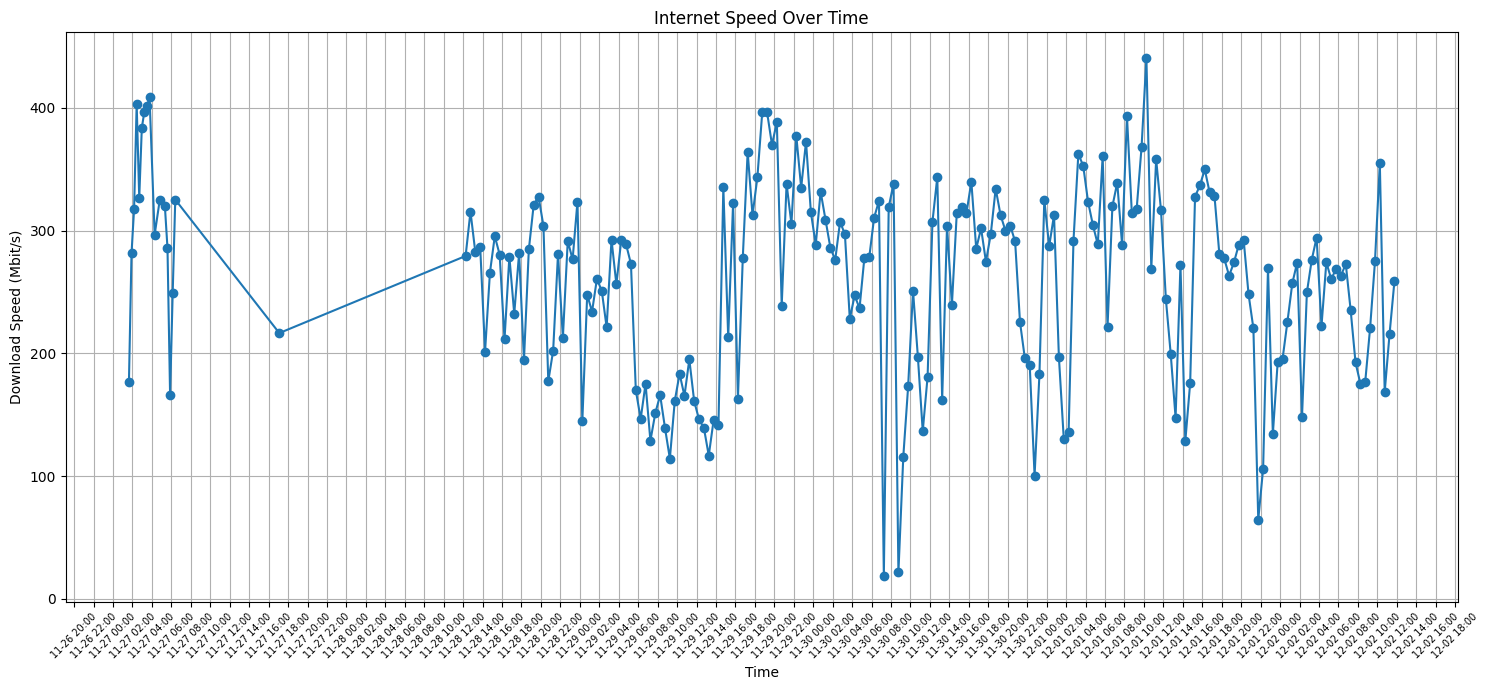

In [4]:

import matplotlib.dates as mdates

# Plot the data with more readable time labels
plt.figure(figsize=(15, 7))
plt.plot(parsed_timestamps, speeds, marker="o", linestyle="-")
plt.title("Internet Speed Over Time")
plt.xlabel("Time")
plt.ylabel("Download Speed (Mbit/s)")
plt.xticks(rotation=45, fontsize=7)

# Set the major locator for the x-axis to show every 2 hours for better readability
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

plt.grid()
plt.tight_layout()

# Show the plot
plt.show()
